In [4]:
import sys
sys.path.append('../..')
import pandas as pd
import numpy as np
import src.cleaning as clean
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [5]:
sales_data = pd.read_csv('../../data/anon_data.csv')
cleaned_data = clean.clean_data(sales_data)

C:\Users\C\AppData\Local\Temp\ipykernel_18120\1800904834.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  sales_data = pd.read_csv('../../data/anon_data.csv')


In [6]:
pivotted_brand_product = cleaned_data.pivot_table(values='quantity', index=['customer_id'], columns=['brand', 'product_type']).fillna(0)

In [5]:
pivotted_brand_product.columns.shape
# This will likely not be applicable as there are too many feature, each with extremely high and low values, scaling these won't help enough as high dimensionality leads to high distance
# However will have a look anyway

(2216,)

In [5]:
results = []
k_range = list(range(20,80))
for k in k_range:
    model = KMeans(n_clusters=k, random_state=26)
    model.fit(pivotted_brand_product)
    results.append(model.inertia_)


d:\Interviews\Exertis\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\Interviews\Exertis\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\Interviews\Exertis\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\Interviews\Exertis\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\Interviews\Exertis\venv\lib\site-packages\skl

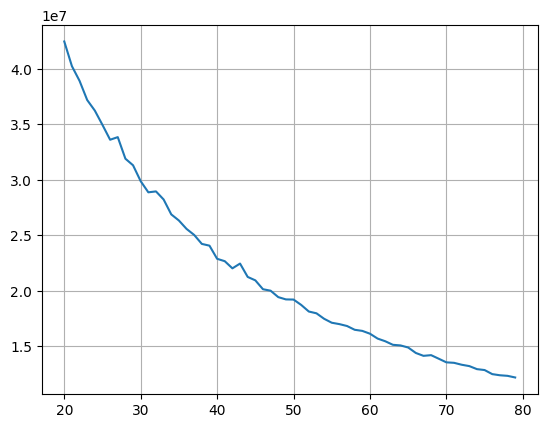

In [6]:
plt.plot(k_range, results)
plt.grid(True)

In [7]:
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler(feature_range=(0,10))
new_data = scalar.fit_transform(pivotted_brand_product)

In [8]:
np.unique(new_data, return_counts=True)

(array([0.00000000e+00, 1.17647059e-03, 1.42382534e-03, ...,
        1.00000000e+01, 1.00000000e+01, 1.00000000e+01]),
 array([5942650,       1,       1, ...,      48,  122086,      47],
       dtype=int64))

In [9]:
results = []
k_range = list(range(20,80))
for k in k_range:
    model = KMeans(n_clusters=k, random_state=26)
    model.fit(new_data)
    results.append(model.inertia_)

d:\Interviews\Exertis\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\Interviews\Exertis\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\Interviews\Exertis\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\Interviews\Exertis\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\Interviews\Exertis\venv\lib\site-packages\skl

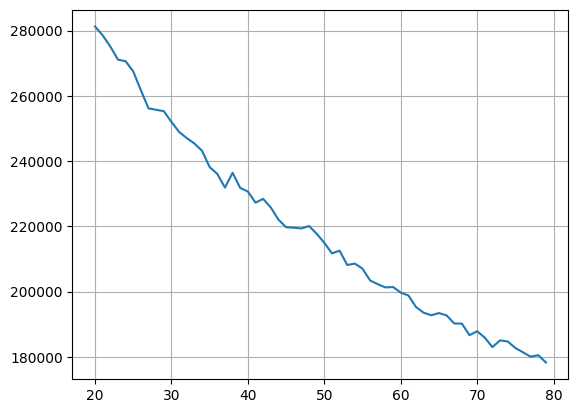

In [10]:
plt.plot(k_range, results)
plt.grid(True)

Not likely to be any good as inertia is still high even after scaling. Look to scale on different features

In [2]:
from sklearn.metrics import silhouette_score

In [19]:
clusterer = KMeans(n_clusters=80, random_state=26)
clusters = clusterer.fit_predict(new_data)

d:\Interviews\Exertis\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [15]:
len(model.labels_)

3320

In [21]:
silhouette_score(new_data, clusterer.labels_)

0.3882744044484032

In [23]:
clusterer.cluster_centers_

array([[ 1.87500000e+00,  4.33680869e-19,  4.33680869e-19, ...,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.87500000e+00, -6.93889390e-18, -6.93889390e-18, ...,
         1.00283286e+00,  2.09841570e-03,  7.77741805e-03],
       [ 1.87500000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 1.87500000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.87500000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.87500000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

# Consider PCA

In [24]:
from sklearn.decomposition import PCA


In [34]:
pca = PCA(0.95)

In [36]:
pca_data = pca.fit_transform(new_data)

In [37]:
pca.n_components_

554

Looking for 95% explained variance, PCA still gives 554 dimensions which is a lot

In [31]:
pca_data.shape

(3320, 5)

In [38]:
# Use elbow method to find optimal k
results = []
silhouettes = []
k_range = list(range(2, 40))
for k in k_range:
    k_mean_clusterer = KMeans(n_clusters=k, random_state=26)
    k_mean_clusterer.fit(pca_data)
    silhouettes.append(silhouette_score(pca_data, k_mean_clusterer.labels_))
    results.append(k_mean_clusterer.inertia_)

d:\Interviews\Exertis\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\Interviews\Exertis\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\Interviews\Exertis\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\Interviews\Exertis\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\Interviews\Exertis\venv\lib\site-packages\skl

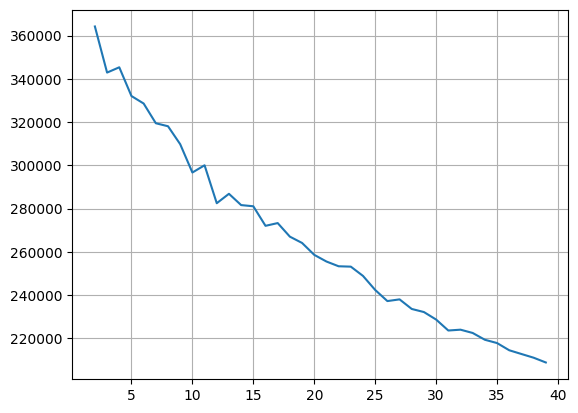

In [39]:
plt.plot(k_range, results)
plt.grid(True)
# K c


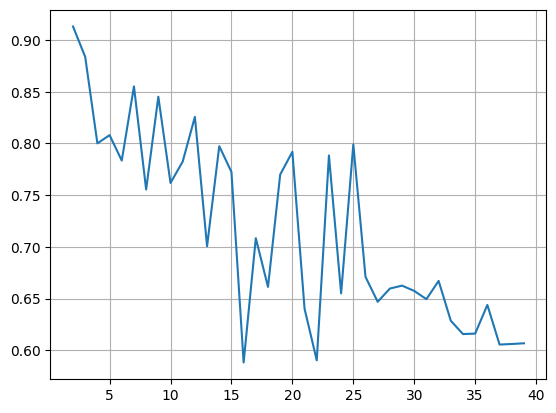

In [40]:
plt.plot(k_range, silhouettes)
plt.grid(True)
# K c